In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

from matplotlib import pyplot as plt

# Business problem

- How to see price dislocation in the housing sector based on zipcodes.
- Basing a avg dollar/sf per neighborhood to help us identify the potential houses.

# Shareholders

- Real Estate investment group

# Data cleaning

- will drop Nan heat and sewer as it's a very small portion of the dataset

In [2]:
houses = pd.read_csv('../data/kc_house_data.csv')

In [3]:
houses['date']= pd.to_datetime(houses['date'])

In [4]:
houses['date'].min()

Timestamp('2021-06-10 00:00:00')

In [5]:
houses['address'][2]

'8504 South 113th Street, Seattle, Washington 98178, United States'

In [6]:
houses.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [8]:
#Testing out how to strip the zipcode and city from one string
houses['address'][53].split(',')[2].split()[0] + ' ' + houses['address'][53].split(',')[2].split()[1]

'New Jersey'

In [9]:
def city(address):
    address_list = address.split(',')
    if len(address_list) == 6:
        city = address_list[3].strip()
    elif len(address_list) == 5:
        city = address_list[2].strip()
    else:
        city = address_list[1].strip()
    return city

def state(address):
    address_list = address.split(',')
    if len(address_list) == 6:
        statezip = address_list[4].split()
    elif len(address_list) == 5:
        statezip = address_list[3].split()
    else:
        statezip = address_list[2].split()
        
    if len(statezip) > 2:
        state = statezip[0] + ' ' + statezip[1]
    else:
        state = statezip[0]
    return state

def zipcode(address):
    address_list = address.split(',')
    zipcode = address_list[-2].split()[-1]
    return zipcode

In [10]:
houses['city'] = houses['address'].map(city)

In [11]:
houses['zipcode'] = houses['address'].map(zipcode)
houses['state'] = houses['address'].map(state)

In [12]:
houses['$/sf'] = houses['price']/houses['sqft_living']

In [13]:
#Cleaning the dataset to only have sale prices in Washington
clean_houses = houses.loc[houses['state'] == 'Washington']
houses.drop_duplicates(subset=['id'], inplace=True)

In [14]:
test = houses.loc[houses['state']=="Washington"]
#test['zipcode'].value_counts().describe(), can help us limit our zipcodes to most frequent
# but can give us a success bias in terms of neighborhoods

In [15]:
# Cleaning up the dataframe to only have house prices in Washington
clean_houses['yr_sold'] = pd.to_datetime(clean_houses['date'], infer_datetime_format=True).dt.year 
clean_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29245 entries, 0 to 30154
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29245 non-null  int64         
 1   date           29245 non-null  datetime64[ns]
 2   price          29245 non-null  float64       
 3   bedrooms       29245 non-null  int64         
 4   bathrooms      29245 non-null  float64       
 5   sqft_living    29245 non-null  int64         
 6   sqft_lot       29245 non-null  int64         
 7   floors         29245 non-null  float64       
 8   waterfront     29245 non-null  object        
 9   greenbelt      29245 non-null  object        
 10  nuisance       29245 non-null  object        
 11  view           29245 non-null  object        
 12  condition      29245 non-null  object        
 13  grade          29245 non-null  object        
 14  heat_source    29215 non-null  object        
 15  sewer_system   2923

<ipython-input-15-044207e74edf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_houses['yr_sold'] = pd.to_datetime(clean_houses['date'], infer_datetime_format=True).dt.year


In [16]:
pd.DataFrame(clean_houses.groupby(['zipcode','yr_sold']).median()['price']).tail(50)

price
zipcode yr_sold           
98126   2022      815000.0
98133   2021      727000.0
        2022      850000.0
98136   2021      850000.0
        2022      979500.0
98144   2021      840000.0
        2022      940000.0
98146   2021      634000.0
        2022      703800.0
98148   2021      595000.0
        2022      632300.0
98155   2021      800000.0
        2022      905000.0
98166   2021      799950.0
        2022      809100.5
98168   2021      532500.0
        2022      575000.0
98177   2021     1067500.0
        2022     1125000.0
98178   2021      605000.0
        2022      649000.0
98188   2021      580000.0
        2022      655000.0
98198   2021      540000.0
        2022      605500.0
98199   2021     1262500.0
        2022     1425000.0
98223   2021     2077000.0
98224   2021      226000.0
98251   2021      522950.0
        2022      500000.0
98270   2022     2375000.0
98271   2021      684500.0
        2022     2750000.0
98272   2021      955000.0
        2022     1270000.0
98288   2021      370000.0
        2022      395000.0
98296   2021      700000.0
98338   2021      754950.0
98354   2021      565000.0
        2022      597500.0
98372   2022      907475.0
98387   2022      592475.0
98422   2022      312750.0
98663   2021      597450.0
99202   2021      759950.0
99203   2022      679950.0
99223   2022      879000.0
99403   2021      789995.0

In [70]:
zipcode_df = pd.DataFrame(clean_houses.groupby(['zipcode','yr_sold']).median()['price'])
zipcode_df.tail(60)

price
zipcode yr_sold           
98117   2022     1100000.0
98118   2021      719975.0
        2022      800000.0
98119   2021     1250000.0
        2022     1490000.0
98122   2021      937500.0
        2022      990000.0
98125   2021      810000.0
        2022      891500.0
98126   2021      706000.0
        2022      815000.0
98133   2021      727000.0
        2022      850000.0
98136   2021      850000.0
        2022      979500.0
98144   2021      840000.0
        2022      940000.0
98146   2021      634000.0
        2022      703800.0
98148   2021      595000.0
        2022      632300.0
98155   2021      800000.0
        2022      905000.0
98166   2021      799950.0
        2022      809100.5
98168   2021      532500.0
        2022      575000.0
98177   2021     1067500.0
        2022     1125000.0
98178   2021      605000.0
        2022      649000.0
98188   2021      580000.0
        2022      655000.0
98198   2021      540000.0
        2022      605500.0
98199   2021     1262500.0
        2022     1425000.0
98223   2021     2077000.0
98224   2021      226000.0
98251   2021      522950.0
        2022      500000.0
98270   2022     2375000.0
98271   2021      684500.0
        2022     2750000.0
98272   2021      955000.0
        2022     1270000.0
98288   2021      370000.0
        2022      395000.0
98296   2021      700000.0
98338   2021      754950.0
98354   2021      565000.0
        2022      597500.0
98372   2022      907475.0
98387   2022      592475.0
98422   2022      312750.0
98663   2021      597450.0
99202   2021      759950.0
99203   2022      679950.0
99223   2022      879000.0
99403   2021      789995.0

In [145]:
test_df = pd.DataFrame(clean_houses.groupby('zipcode').median()['price']).sort_values(by='price')
test_df

,price
zipcode,
98224,226000.0
98422,312750.0
98288,380000.0
98002,470000.0
98047,500000.0
...,...
98223,2077000.0
98270,2375000.0
98040,2394000.0


In [143]:
bot_zips = clean_houses.loc[clean_houses['zipcode'].isin(['98422','98224','98288','98002','98047','98003','98023','98001','98092','98198'])]
bot_zips

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_built,yr_renovated,address,lat,long,city,zipcode,state,$/sf,yr_sold
8,2944500680,2022-03-17,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320,Federal Way,98023,Washington,333.333333,2022
13,3845100260,2021-11-15,828000.0,4,3.0,3170,6343,2.0,NO,NO,...,2015,0,"2634 57th Street Southeast, Auburn, Washington...",47.257680,-122.194530,Auburn,98092,Washington,261.198738,2021
14,1895460330,2021-08-26,661000.0,4,2.5,2408,7202,2.0,NO,NO,...,2005,0,"1781 Southwest 345th Place, Federal Way, Washi...",47.291935,-122.358010,Federal Way,98023,Washington,274.501661,2021
39,1421059003,2021-08-25,1680000.0,3,2.5,5200,206039,1.0,NO,NO,...,2007,0,"15916 Southeast 326th Street, Auburn, Washingt...",47.310595,-122.129380,Auburn,98092,Washington,323.076923,2021
45,6053400345,2021-12-13,315000.0,3,1.0,1150,6477,1.0,NO,NO,...,1950,0,"415 B Street Northeast, Auburn, Washington 980...",47.311495,-122.228075,Auburn,98002,Washington,273.913043,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30124,1141400010,2021-08-30,540000.0,3,2.5,1797,4779,2.0,NO,NO,...,2005,0,"3409 South 382nd Street, Auburn, Washington 98...",47.258790,-122.291340,Auburn,98001,Washington,300.500835,2021
30128,1761100480,2022-02-08,560000.0,3,2.0,1480,8770,1.0,NO,NO,...,1985,0,"2213 Southwest 350th Place, Federal Way, Washi...",47.287330,-122.362055,Federal Way,98023,Washington,378.378378,2022
30134,4137070140,2021-07-27,656500.0,3,2.5,2220,6994,2.0,NO,NO,...,1994,0,"5017 Nathan Avenue Southeast, Auburn, Washingt...",47.263165,-122.211830,Auburn,98092,Washington,295.720721,2021
30146,3915500105,2021-12-03,380000.0,3,1.0,860,7805,1.0,NO,NO,...,1947,0,"407 M Street Southeast, Auburn, Washington 980...",47.304110,-122.213920,Auburn,98002,Washington,441.860465,2021


In [97]:
zipcode_2021 = bot_zips.loc[clean_houses['yr_sold'] == 2021]
zipcode_2022 = bot_zips.loc[clean_houses['yr_sold'] == 2022]
grouped_2021 = pd.DataFrame(zipcode_2021.groupby(['zipcode']).median()['price'])
grouped_2022 = pd.DataFrame(zipcode_2022.groupby(['zipcode']).median()['price'])


In [141]:
(grouped_2022['price']-grouped_2021['price'])/grouped_2021['price']

zipcode
98001    0.130435
98002    0.109890
98003    0.083333
98023    0.114497
98047    0.149366
98092    0.114819
98198    0.121296
98224         NaN
98288    0.067568
98422         NaN
Name: price, dtype: float64

In [111]:
grouped_2022.index

Index(['98001', '98002', '98003', '98023', '98047', '98092', '98198', '98288',
       '98422'],
      dtype='object', name='zipcode')

In [112]:
grouped_2021.index

Index(['98001', '98002', '98003', '98023', '98047', '98092', '98198', '98224',
       '98288'],
      dtype='object', name='zipcode')

In [117]:
x_ticks_2021 = np.array([0,1,2,3,4,5,6,7,8])
x_ticks_2022 = np.array([0,1,2,3,4,5,6,8,9])

In [122]:
width = .35

''

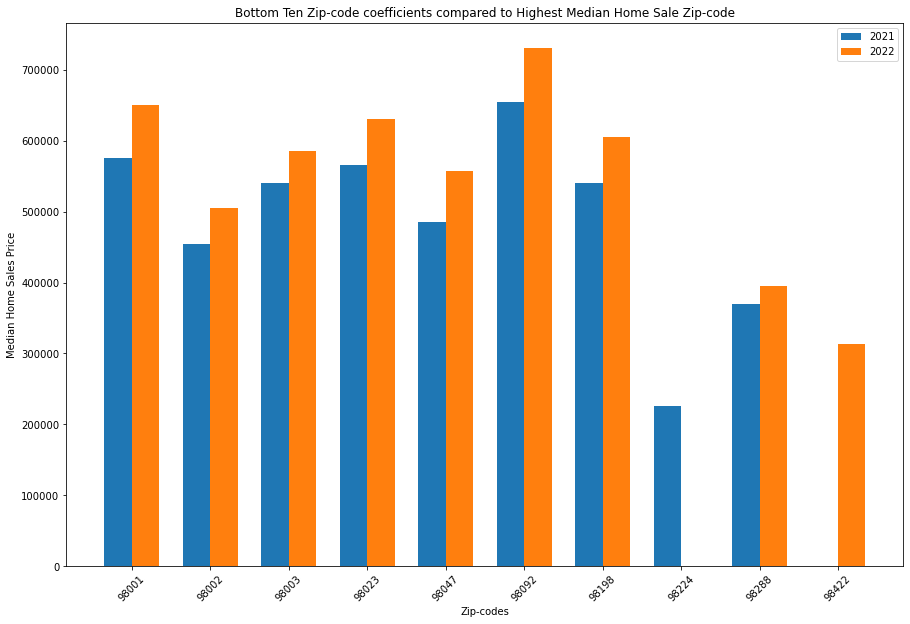

In [138]:
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x=(x_ticks_2021-width/2),height=grouped_2021['price'], width = width)
ax.bar(x=(x_ticks_2022+width/2),height=grouped_2022['price'],width=width)

ax.set_xticks(np.arange(10))
ax.set_xticklabels(['98001', '98002', '98003', '98023', '98047', '98092', '98198','98224' ,'98288',
       '98422'], rotation =45)
ax.set_title('Bottom Ten Zip-code coefficients compared to Highest Median Home Sale Zip-code')
ax.set_xlabel('Zip-codes')
ax.set_ylabel('Median Home Sales Price')
ax.legend(["2021","2022"])
;

In [139]:
# Trial and error
#['98422','98224','98288','98002','98047','98003','98023','98001','98092','98198']]
#f, a = plt.subplots(3,1,figsize=(25,50))
#zipcode_df.xs('98422').plot(kind='bar', ax=a[0])
#zipcode_df.xs('98224').plot(kind='bar', ax=a[1])
#zipcode_df.xs('98288').plot(kind='bar', ax=a[2])
#zipcode_df.xs('2022').plot(kind='bar',ax=a[1])

In [17]:
clean_houses.corr()
#sns.heatmap(houses.corr(), annot=True); Looks very wonky

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,$/sf,yr_sold
id,1.000000,-0.030327,-0.004777,-0.012036,-0.027965,-0.120867,0.034504,-0.022610,-0.015461,-0.007126,-0.042708,0.022515,-0.029418,-0.000778,0.007022,-0.008332,-0.008654
price,-0.030327,1.000000,0.291249,0.488067,0.616636,0.085970,0.199171,0.546133,0.246585,0.267966,0.317207,0.106068,0.085264,0.296111,0.073191,0.066439,0.069729
bedrooms,-0.004777,0.291249,1.000000,0.594674,0.631847,-0.002616,0.195010,0.538952,0.235485,0.306885,0.191401,0.182935,0.009719,-0.015772,0.116439,-0.016610,-0.029393
bathrooms,-0.012036,0.488067,0.594674,1.000000,0.780273,0.036626,0.427247,0.681563,0.261029,0.462000,0.332850,0.456106,0.041634,0.047334,0.160594,0.002126,-0.043126
sqft_living,-0.027965,0.616636,0.631847,0.780273,1.000000,0.115945,0.355056,0.882006,0.336148,0.504548,0.405160,0.328750,0.034856,0.049240,0.210824,-0.022443,-0.031061
sqft_lot,-0.120867,0.085970,-0.002616,0.036626,0.115945,1.000000,-0.021385,0.125929,0.002092,0.082793,0.157908,0.012073,0.008378,-0.072746,0.168691,0.035294,-0.005236
floors,0.034504,0.199171,0.195010,0.427247,0.355056,-0.021385,1.000000,0.504452,-0.243099,0.178853,0.123638,0.521931,-0.016167,0.046203,0.088905,-0.000081,-0.017415
sqft_above,-0.022610,0.546133,0.538952,0.681563,0.882006,0.125929,0.504452,1.000000,-0.073043,0.554530,0.320124,0.427948,0.006737,-0.021393,0.307429,-0.020324,-0.024558
sqft_basement,-0.015461,0.246585,0.235485,0.261029,0.336148,0.002092,-0.243099,-0.073043,1.000000,0.017771,0.214710,-0.226564,0.052144,0.186846,-0.207366,-0.004041,-0.010417
sqft_garage,-0.007126,0.267966,0.306885,0.462000,0.504548,0.082793,0.178853,0.554530,0.017771,1.000000,0.227530,0.495760,-0.104712,-0.128431,0.342101,-0.016790,-0.013557


In [18]:
# Now let's run a simple model with just price and sqft_living since it seems to be the most
# correlated according to the table above. Only a 0.37 R^2, hmmm. Model says cond number is
# large. Might be some multicollinearity. Have to figure that out with all the sqft columns.

y = clean_houses['price']
X = clean_houses['sqft_living']

simple_model = sm.OLS(endog=y, exog=sm.add_constant(X))
simple_model_results = simple_model.fit()
simple_model_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.794e+04
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:59:11   Log-Likelihood:            -4.3530e+05
No. Observations:               29245   AIC:                         8.706e+05
Df Residuals:                   29243   BIC:                         8.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.096e+04   9885.430     -9.201      0.000    -1.1e+05   -7.16e+04
sqft_living   564.8702      4.217    133.945      0.000     556.604     573.136
==============================================================================
Omnibus:                    42311.890   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50082855.939
Skew:                           8.230   Prob(JB):                         0.00
Kurtosis:                     205.064   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
simple_model_results.pvalues

const          3.758984e-20
sqft_living    0.000000e+00
dtype: float64

Text(0.5, 0.98, 'Residuals Vs. Predictions')

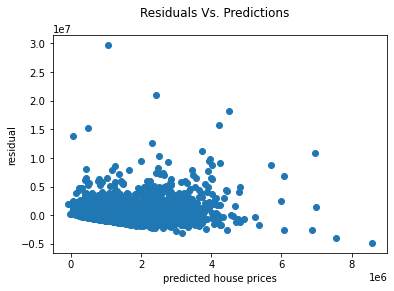

In [20]:
model_preds = simple_model_results.predict(sm.add_constant(X))
resids = y - model_preds

fig, ax = plt.subplots()
ax.scatter(model_preds, resids)
ax.set_xlabel('predicted house prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions')

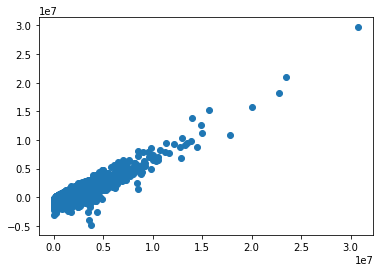

In [21]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

In [22]:
dw = sm.stats.stattools.durbin_watson
dw(resids)

1.9370921702342048

In [23]:
def Rsquaredcomp(dataframe,target_str,comp_list):
    Rsquared = []
    for i in comp_list:
        y = dataframe[target_str]
        X = dataframe[i]
        simple_model = sm.OLS(endog=y, exog=sm.add_constant(X))
        simple_model_results = simple_model.fit()
        r2 = simple_model_results.rsquared
        Rsquared.append(r2)
    
    df = pd.DataFrame(np.array(Rsquared),index=comp_list,columns=["Rsquared"])
    return df

In [24]:
comp = ['floors','bedrooms','bathrooms','floors','sqft_living', 'sqft_above','sqft_basement','sqft_garage','sqft_patio', 'sqft_lot',
        'yr_built', 'yr_renovated','$/sf','lat','long']
Rsquaredcomp(clean_houses,'price',comp)

,Rsquared
floors,0.039669
bedrooms,0.084826
bathrooms,0.238209
floors,0.039669
sqft_living,0.380240
sqft_above,0.298261
sqft_basement,0.060804
sqft_garage,0.071806
sqft_patio,0.100620
sqft_lot,0.007391


In [25]:
#pd.get_dummies(clean_houses['condition'],prefix='cond_')

In [26]:
#dummying out zipcode
cat_df = pd.get_dummies(clean_houses,columns=['zipcode'])
clean_houses['zipcode'].value_counts()

98042    992
98038    858
98115    761
98103    761
98117    748
        ... 
98422      1
99223      1
98270      1
99202      1
98296      1
Name: zipcode, Length: 92, dtype: int64

In [27]:
clean_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_built,yr_renovated,address,lat,long,city,zipcode,state,$/sf,yr_sold
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,Renton,98055,Washington,572.033898,2022
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,Seattle,98133,Washington,332.129964,2021
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,Seattle,98178,Washington,107.986111,2021
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,Seattle,98118,Washington,358.796296,2021
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,Issaquah,98027,Washington,529.017857,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,Seattle,98103,Washington,814.136126,2021
30151,194000695,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,Seattle,98116,Washington,650.000000,2021
30152,7960100080,2022-05-27,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,Seattle,98122,Washington,493.827160,2022
30153,2781280080,2022-02-24,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,Renton,98055,Washington,301.556420,2022


In [28]:
#clean_houses.info()

In [29]:
#pd.get_dummies(clean_houses['view'])

In [30]:
#Getting dummies for all the categorical values
cat_df = pd.get_dummies(cat_df,columns=['waterfront'],prefix="water_" )
cat_df = pd.get_dummies(cat_df,columns=['greenbelt'],prefix="green_" )
cat_df = pd.get_dummies(cat_df,columns=['nuisance'],prefix="nuisance_" )
cat_df = pd.get_dummies(cat_df,columns=['view'],prefix="view_" )
cat_df = pd.get_dummies(cat_df,columns=['condition'],prefix="cond_" )
cat_df = pd.get_dummies(cat_df,columns=['grade'],prefix="grade_" )
cat_df = pd.get_dummies(cat_df,columns=['heat_source'],prefix="heat_" )
cat_df = pd.get_dummies(cat_df,columns=['sewer_system'],prefix="sewer_" )

In [150]:
list(cat_df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'address',
 'lat',
 'long',
 'city',
 'state',
 '$/sf',
 'yr_sold',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98047',
 'zipcode_98050',
 'zipcode_98051',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98057',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipc

In [31]:
# Have to get_dummy the following categories (condition,grade,heat_source,'sewer_system')
# and see how to go about not creating such a big dataframe.
cat_zip_df = clean_houses[['price','sqft_living','zipcode']]
cat_zip_df = pd.get_dummies(cat_zip_df,columns=['zipcode'])
y = cat_zip_df['price']
#dropping the most frequent zipcode
cat_zip_df.drop(columns=['zipcode_98042','price'],axis=1,inplace=True)
testdf_model = sm.OLS(endog=y, exog=sm.add_constant(cat_zip_df))
testdf_results = testdf_model.fit()
testdf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     456.8
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:59:12   Log-Likelihood:            -4.2924e+05
No. Observations:               29245   AIC:                         8.587e+05
Df Residuals:                   29152   BIC:                         8.594e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.206e+05   1.99e+04    -16.071      0.000    -3.6e+05   -2.81e+05
sqft_living     464.0297      3.807    121.904      0.000     456.569     471.491
zipcode_98001 -6582.0588   2.93e+04     -0.224      0.822   -6.41e+04    5.09e+04
zipcode_98002  7.963e+04   3.52e+04      2.260      0.024    1.06e+04    1.49e+05
zipcode_98003   3.28e+04   3.29e+04      0.998      0.318   -3.16e+04    9.72e+04
zipcode_98004  2.431e+06   3.71e+04     65.452      0.000    2.36e+06     2.5e+06
zipcode_98005  1.158e+06   4.66e+04     24.865      0.000    1.07e+06    1.25e+06
zipcode_98006  8.576e+05   3.11e+04     27.592      0.000    7.97e+05    9.19e+05
zipcode_98007  7.086e+05   4.97e+04     14.256      0.000    6.11e+05    8.06e+05
zipcode_98008  8.398e+05   3.41e+04     24.640      0.000    7.73e+05    9.07e+05
zipcode_98010 -4.045e+04   3.72e+04     -1.089      0.276   -1.13e+05    3.24e+04
zipcode_98011  4.329e+05   3.99e+04     10.858      0.000    3.55e+05    5.11e+05
zipcode_98014  2.513e+05   4.92e+04      5.112      0.000    1.55e+05    3.48e+05
zipcode_98019  2.214e+05   4.09e+04      5.416      0.000    1.41e+05    3.02e+05
zipcode_98022  6.839e+04   3.24e+04      2.111      0.035    4878.085    1.32e+05
zipcode_98023 -1.285e+04   2.84e+04     -0.453      0.651   -6.85e+04    4.28e+04
zipcode_98024  6.902e+05   5.68e+04     12.157      0.000    5.79e+05    8.01e+05
zipcode_98027  5.082e+05   3.46e+04     14.690      0.000     4.4e+05    5.76e+05
zipcode_98028  3.484e+05   3.57e+04      9.753      0.000    2.78e+05    4.18e+05
zipcode_98029  6.902e+05   3.69e+04     18.712      0.000    6.18e+05    7.63e+05
zipcode_98030  5299.1901   3.47e+04      0.153      0.879   -6.28e+04    7.34e+04
zipcode_98031  3.159e+04   3.09e+04      1.023      0.306   -2.89e+04    9.21e+04
zipcode_98032  8.957e+04   4.61e+04      1.943      0.052    -762.555     1.8e+05
zipcode_98033  1.177e+06   2.96e+04     39.772      0.000    1.12e+06    1.24e+06
zipcode_98034  6.346e+05   2.84e+04     22.316      0.000    5.79e+05     6.9e+05
zipcode_98038  9.557e+04   2.68e+04      3.572      0.000    4.31e+04    1.48e+05
zipcode_98039  3.921e+06   7.71e+04     50.836      0.000    3.77e+06    4.07e+06
zipcode_98040  1.543e+06    3.6e+04     42.877      0.000    1.47e+06    1.61e+06
zipcode_98045  2.507e+05   3.22e+04      7.796      0.000    1.88e+05    3.14e+05
zipcode_98047  6.429e+04   6.75e+04      0.952      0.341    -6.8e+04    1.97e+05
zipcode_98050  6.264e+05   4.06e+05      1.542      0.123    -1.7e+05    1.42e+06
zipcode_98051  1.257e+05   7.24e+04      1.735      0.083   -1.63e+04    2.68e+05
zipcode_98052   7.82e+05   3.02e+04     25.885      0.000    7.23e+05    8.41e+05
zipcode_98053  6.382e+05   3.43e+04     18.622      0.000    5.71e+05    7.05e+05
zipcode_98055  7.383e+04   4.28e+04      1.723   

In [32]:
clean_houses['condition'].value_counts()

Average      17645
Good          8048
Very Good     3259
Fair           229
Poor            64
Name: condition, dtype: int64

In [33]:
cat_cond_df = clean_houses[['price','sqft_living','condition']]
cat_cond_df = pd.get_dummies(cat_cond_df,columns=['condition'],prefix='cond')
y = cat_cond_df['price']
#Dropping most frequent
cat_cond_df.drop(columns=['cond_Average','price'],axis=1,inplace=True)
testdf_model = sm.OLS(endog=y, exog=sm.add_constant(cat_cond_df))
testdf_results = testdf_model.fit()
testdf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     3604.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:59:12   Log-Likelihood:            -4.3527e+05
No. Observations:               29245   AIC:                         8.706e+05
Df Residuals:                   29239   BIC:                         8.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.145e+05   1.08e+04    -10.603      0.000   -1.36e+05   -9.33e+04
sqft_living      567.2493      4.245    133.620      0.000     558.928     575.570
cond_Fair       4.807e+04   4.69e+04      1.024      0.306   -4.39e+04     1.4e+05
cond_Good       2.714e+04   9512.341      2.853      0.004    8491.904    4.58e+04
cond_Poor       4.149e+04   8.83e+04      0.470      0.638   -1.32e+05    2.15e+05
cond_Very Good  9.416e+04   1.35e+04      7.001      0.000    6.78e+04    1.21e+05
==============================================================================
Omnibus:                    42384.555   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50588536.463
Skew:                           8.257   Prob(JB):                         0.00
Kurtosis:                     206.084   Cond. No.                     5.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
clean_houses['grade'].value_counts()

7 Average        11558
8 Good            8875
9 Better          3598
6 Low Average     2854
10 Very Good      1352
11 Excellent       402
5 Fair             392
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [35]:
cat_grd_df = clean_houses[['price','sqft_living','grade']]
cat_grd_df = pd.get_dummies(cat_grd_df,columns=['grade'],prefix='grd')
y = cat_grd_df['price']
#Dropping most frequent
cat_grd_df.drop(columns=['grd_13 Mansion','price'],axis=1,inplace=True)
testdf_model = sm.OLS(endog=y, exog=sm.add_constant(cat_grd_df))
testdf_results = testdf_model.fit()
testdf_results.summary()

# I want those lesser grades, so that they can be indentifier's for good zipcodes
# but they're technically not stat significant. Consult with Dan

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     2016.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:59:13   Log-Likelihood:            -4.3294e+05
No. Observations:               29245   AIC:                         8.659e+05
Df Residuals:                   29231   BIC:                         8.660e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.861e+06   1.41e+05     34.427      0.000    4.58e+06    5.14e+06
sqft_living         311.7619      5.921     52.655      0.000     300.157     323.367
grd_1 Cabin        -3.57e+06   4.81e+05     -7.423      0.000   -4.51e+06   -2.63e+06
grd_10 Very Good  -3.682e+06   1.36e+05    -26.989      0.000   -3.95e+06   -3.41e+06
grd_11 Excellent  -2.755e+06   1.38e+05    -19.930      0.000   -3.03e+06   -2.48e+06
grd_12 Luxury     -1.572e+06   1.46e+05    -10.779      0.000   -1.86e+06   -1.29e+06
grd_2 Substandard -4.704e+06   4.81e+05     -9.785      0.000   -5.65e+06   -3.76e+06
grd_3 Poor        -4.628e+06   2.28e+05    -20.287      0.000   -5.08e+06   -4.18e+06
grd_4 Low         -4.422e+06   1.67e+05    -26.483      0.000   -4.75e+06   -4.09e+06
grd_5 Fair        -4.524e+06   1.43e+05    -31.574      0.000    -4.8e+06   -4.24e+06
grd_6 Low Average -4.585e+06   1.39e+05    -32.883      0.000   -4.86e+06   -4.31e+06
grd_7 Average     -4.579e+06   1.38e+05    -33.142      0.000   -4.85e+06   -4.31e+06
grd_8 Good        -4.476e+06   1.37e+05    -32.579      0.000   -4.75e+06   -4.21e+06
grd_9 Better      -4.159e+06   1.37e+05    -30.430      0.000   -4.43e+06   -3.89e+06
==============================================================================
Omnibus:                    41956.745   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         53920852.430
Skew:                           8.051   Prob(JB):                         0.00
Kurtosis:                     212.740   Cond. No.                     3.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
clean_houses['heat_source'][0]

'Gas'

In [37]:
cat_ht_df = clean_houses[['price','sqft_living','heat_source']]
cat_ht_df = pd.get_dummies(cat_ht_df,columns=['heat_source'],prefix='heat')
y = cat_ht_df['price']
#Dropping most frequent
cat_ht_df.drop(columns=['heat_Gas','price'],axis=1,inplace=True)
testdf_model = sm.OLS(endog=y, exog=sm.add_constant(cat_ht_df))
testdf_results = testdf_model.fit()
testdf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     2572.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:59:13   Log-Likelihood:            -4.3528e+05
No. Observations:               29245   AIC:                         8.706e+05
Df Residuals:                   29237   BIC:                         8.706e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.108e+05   1.12e+04     -9.861      0.000   -1.33e+05   -8.88e+04
sqft_living              568.9250      4.378    129.948      0.000     560.344     577.506
heat_Electricity        1.515e+04   1.07e+04      1.422      0.155   -5735.519     3.6e+04
heat_Electricity/Solar -7.492e+04   9.34e+04     -0.802      0.423   -2.58e+05    1.08e+05
heat_Gas/Solar          2.911e+05   7.32e+04      3.976      0.000    1.48e+05    4.35e+05
heat_Oil                 7.29e+04   1.42e+04      5.117      0.000     4.5e+04    1.01e+05
heat_Oil/Solar         -1.664e+04   3.52e+05     -0.047      0.962   -7.07e+05    6.74e+05
heat_Other              1.684e+05   1.58e+05      1.069      0.285    -1.4e+05    4.77e+05
==============================================================================
Omnibus:                    42311.540   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50306731.139
Skew:                           8.228   Prob(JB):                         0.00
Kurtosis:                     205.518   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
clean_houses['city'].value_counts()

Seattle           9372
Renton            1946
Kent              1583
Auburn            1509
Bellevue          1484
                  ... 
Clarkston            1
Fairwood             1
Lakeland North       1
Snohomish            1
Cottage Lake         1
Name: city, Length: 65, dtype: int64

In [39]:
cat_city_df = clean_houses[['price','sqft_living','city']]
cat_city_df = pd.get_dummies(cat_city_df,columns=['city'])
y = cat_city_df['price']
#Dropping most frequent
cat_city_df.drop(columns=['city_Seattle','price'],axis=1,inplace=True)
testdf_model = sm.OLS(endog=y, exog=sm.add_constant(cat_city_df))
testdf_results = testdf_model.fit()
testdf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     591.2
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:59:13   Log-Likelihood:            -4.3001e+05
No. Observations:               29245   AIC:                         8.602e+05
Df Residuals:                   29179   BIC:                         8.607e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.851e+05   9259.806     19.993      0.000    1.67e+05    2.03e+05
sqft_living                    486.7497      3.817    127.524      0.000     479.268     494.231
city_Algona                  -4.801e+05   8.35e+04     -5.750      0.000   -6.44e+05   -3.16e+05
city_Ames Lake               -3.033e+05   5.89e+05     -0.515      0.607   -1.46e+06    8.51e+05
city_Arlington                1.905e+05   2.95e+05      0.647      0.518   -3.87e+05    7.68e+05
city_Auburn                  -5.527e+05   1.64e+04    -33.799      0.000   -5.85e+05   -5.21e+05
city_Baring                  -3.652e+05   2.23e+05     -1.640      0.101   -8.02e+05    7.12e+04
city_Beaux Arts               9.321e+05   1.78e+05      5.247      0.000    5.84e+05    1.28e+06
city_Bellevue                 4.963e+05   1.68e+04     29.597      0.000    4.63e+05    5.29e+05
city_Black Diamond           -5.951e+05   3.59e+04    -16.591      0.000   -6.65e+05   -5.25e+05
city_Bothell                 -1.268e+05   3.68e+04     -3.445      0.001   -1.99e+05   -5.47e+04
city_Burien                  -3.324e+05   2.45e+04    -13.570      0.000    -3.8e+05   -2.84e+05
city_Carnation               -2.988e+05   4.71e+04     -6.342      0.000   -3.91e+05   -2.06e+05
city_Clarkston               -3.278e+04   5.89e+05     -0.056      0.956   -1.19e+06    1.12e+06
city_Clyde Hill               2.434e+06   7.33e+04     33.202      0.000    2.29e+06    2.58e+06
city_Cottage Lake             2.577e+05   5.89e+05      0.438      0.662   -8.96e+05    1.41e+06
city_Covington               -5.274e+05    2.7e+04    -19.546      0.000    -5.8e+05   -4.75e+05
city_Dash Point               -1.08e+06   5.89e+05     -1.833      0.067   -2.23e+06    7.47e+04
city_Des Moines              -4.429e+05   2.93e+04    -15.131      0.000      -5e+05   -3.86e+05
city_Dilworth                -8.405e+05   5.89e+05     -1.427      0.154   -1.99e+06    3.14e+05
city_Duvall                  -3.378e+05    3.8e+04     -8.890      0.000   -4.12e+05   -2.63e+05
city_Eatonville              -2.504e+05   4.16e+05     -0.601      0.548   -1.07e+06    5.66e+05
city_Enumclaw                -4.812e+05   2.81e+04    -17.109      0.000   -5.36e+05   -4.26e+05
city_Fairwood                -1.554e+05   5.89e+05     -0.264      0.792   -1.31e+06    9.99e+05
city_Fall City                1.301e+05    5.6e+04      2.322      0.020    2.03e+04     2.4e+05
city_Federal Way             -5.517e+05   1.83e+04    -30.173      0.000   -5.88e+05   -5.16e+05
city_Hobart                   1.914e+05   2.94e+05      0.650      0.516   -3.86e+05    7.69e+05
city_Hunts Point              7.287e+06   2.23e+05     32.718      0.000    6.85e+06    7.72e+06
city_Issaquah                 1.147e+04   2.57e+04      0.446      0.656   -

In [40]:
clean_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29245 entries, 0 to 30154
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29245 non-null  int64         
 1   date           29245 non-null  datetime64[ns]
 2   price          29245 non-null  float64       
 3   bedrooms       29245 non-null  int64         
 4   bathrooms      29245 non-null  float64       
 5   sqft_living    29245 non-null  int64         
 6   sqft_lot       29245 non-null  int64         
 7   floors         29245 non-null  float64       
 8   waterfront     29245 non-null  object        
 9   greenbelt      29245 non-null  object        
 10  nuisance       29245 non-null  object        
 11  view           29245 non-null  object        
 12  condition      29245 non-null  object        
 13  grade          29245 non-null  object        
 14  heat_source    29215 non-null  object        
 15  sewer_system   2923

In [41]:
# Variables sqft above basement patio garage lot - drop
# waterfront - drop
# greenbelt - drop
# nuisance - drop
# view to be kept
# condition - drop
# heat - drop
# grade - keep
# sewer - drop
# city - keep
# state - drop
# $/sf - drop

clean_houses_test = clean_houses.drop(columns=["sqft_above",'sqft_basement','sqft_garage','sqft_patio',
                                              'sqft_lot','waterfront','greenbelt','nuisance','condition',
                                              'heat_source','sewer_system','state','$/sf','yr_built',
                                              'yr_renovated','address','lat','long','floors'])

In [142]:
clean_houses_test.describe()

,id,price,bedrooms,bathrooms,sqft_living,yr_sold
count,2.924500e+04,2.924500e+04,29245.000000,29245.000000,29245.000000,29244.000000
mean,4.535618e+09,1.112574e+06,3.434878,2.332194,2130.639938,2021.361168
std,2.881947e+09,8.952867e+05,0.978905,0.895727,977.332366,0.480347
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,2021.000000
25%,2.085201e+09,6.450000e+05,3.000000,2.000000,1440.000000,2021.000000
50%,3.869900e+09,8.670000e+05,3.000000,2.500000,1940.000000,2021.000000
75%,7.287100e+09,1.310000e+06,4.000000,3.000000,2640.000000,2022.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,2022.000000


In [43]:
"""
Changing date to datetime and then creating a separate column for year
"""
clean_houses_test['date'] = pd.to_datetime(houses['date'], infer_datetime_format=True)

"""
Making a 'yr_sold' column using the year from 'date'
"""
clean_houses_test['yr_sold'] = pd.to_datetime(houses['date'], infer_datetime_format=True).dt.year